# NLP word embedding-> Final version

TO DO
- Hashtags
- tfidf test
- Often combined with dimension reduction:
restriction to an interesting vocabulary
use of principal component analysis (latent semantic analysis): Latent Semantic Analysis= PCA of this representation tfidf


In [3]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt







from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import mean_absolute_error
from verstack.stratified_continuous_split import scsplit # pip install verstack




c:\Users\maria\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


This include all NLP approaches for word embedding

Prediction of Likes and Retweets Using Text Information Retrieval
https://ai.intelligentonlinetools.com/ml/text-clustering-doc2vec-word-embedding-machine-learning/

Paper:
1-s2.0-S1877050920304129-main.pdf


Le github magique:
https://github.com/buomsoo-kim/Word-embedding-with-Python

French corpus: https://stackoverflow.com/questions/42058396/python-nltk-and-textblob-in-french

## Word embedding à la main avec Doc 2 Vec

In [2]:
import re

from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from scipy import spatial




In [50]:
#télcharge "quinze essais politiques" dans data et en fait une liste
# opening the file in read mode
my_file = open("data/quinze_essais_politiques.txt", "r")
  
# reading the file
corpus = my_file.read()
#remove \n
corpus = corpus.replace('\n', ' ')
corpus = corpus.replace('.', ',')

  
# replacing end splitting the text 
# when newline ('\n') is seen.
corpus = corpus.split(",")
my_file.close()
corpus[5]

'              David Hume “Essai sur la liberté de la presse”'

Use re module to preprocess data

Convert all letters into lowercase

Remove punctuations, numbers, etc

In [51]:
for i in range(len(corpus)):
    corpus[i] = corpus[i].lower()
    #remove punctuation
    corpus[i] = re.sub(r'[^\w\s]','',corpus[i])
    #make a list of corpus[i]
    corpus[i] = corpus[i].split()
    

corpus[5]


['david', 'hume', 'essai', 'sur', 'la', 'liberté', 'de', 'la', 'presse']

For the doc2vec model, input data should be in format of iterable TaggedDocuments"

Each TaggedDocument instance comprises words and tags

Hence, each document (i.e., a sentence or paragraph) should have a unique tag which is identifiable

In [52]:
for i in range(len(corpus)):
    corpus[i] = TaggedDocument(words = corpus[i], tags = ['sent{}'.format(i)])    # converting each sentence into a TaggedDocument
corpus[5]

TaggedDocument(words=['david', 'hume', 'essai', 'sur', 'la', 'liberté', 'de', 'la', 'presse'], tags=['sent5'])

In [53]:
model = Doc2Vec(documents = corpus, vector_size = 100, min_count = 1)
model.init_sims(replace = True)

model.save('doc2vec_model')
model = Doc2Vec.load('doc2vec_model')


In [54]:
v1 = model.infer_vector(['Macron',' démission'])    # in doc2vec, infer_vector() function is used to infer the vector embedding of a document
v2 = model.infer_vector(['gilets jaune'])    # in doc2vec, infer_vector() function is used to infer the vector embedding of a document
# define a function that computes cosine similarity between two words
def cosine_similarity(v1, v2):
    return 1 - spatial.distance.cosine(v1, v2)
cosine_similarity(v1, v2)


-0.04253318905830383

# Word embedding with transfer learning

In [55]:
import spacy
# Load the spacy model that you have installed
nlp = spacy.load('fr_core_news_sm')# python -m spacy download fr_core_news_sm
# process a sentence using the model
doc = nlp("Macron démission")
# It's that simple - all of the vectors and words are assigned after this point
# Get the vector for 'text':
doc.vector


array([ 2.77224708e+00, -8.20644140e-01, -3.03102303e+00,  1.71295309e+00,
       -1.51811123e-01, -6.19174361e-01,  8.30909967e-01,  3.04782152e+00,
        3.13939261e+00, -3.14197016e+00,  3.75156593e+00,  7.06376970e-01,
        4.97845650e-01, -7.39134669e-01, -1.51396203e+00, -6.00879252e-01,
        1.98837304e+00, -1.65502715e+00, -2.15656042e-01, -3.06843376e+00,
       -2.57701969e+00, -6.50485158e-02, -1.93754995e+00, -1.44916689e+00,
       -1.40775919e+00, -3.76376247e+00,  7.35826492e-02,  5.47314596e+00,
        2.39667892e+00, -1.73095465e-02, -3.04729295e+00,  3.57966995e+00,
       -4.89883900e-01,  1.82727182e+00, -7.40789533e-01, -2.31122684e+00,
       -6.91391945e-01, -1.97245240e+00,  6.30308867e-01, -3.27573270e-01,
       -3.56692076e-01, -8.23963046e-01,  3.11563540e+00, -4.16857243e+00,
       -1.66391611e+00, -2.21248603e+00,  2.82474899e+00,  5.70967078e-01,
        5.85822582e-01,  2.84727335e+00,  4.80433702e-01, -8.01777303e-01,
       -3.93913603e+00, -

# Models

## Data

In [4]:
# Load the training data
train_data = pd.read_csv("data/train.csv")

# Load the evaluation data
eval_data = pd.read_csv("data/evaluation.csv")


# Here we split our training data into trainig and testing set. This way we can estimate the evaluation of our model without uploading to Kaggle and avoid overfitting over our evaluation dataset.
# scsplit method is used in order to split our regression data in a stratisfied way and keep a similar distribution of retweet counts between the two sets
X_train, X_test, y_train, y_test = scsplit(train_data, train_data['retweets_count'], stratify=train_data['retweets_count'], train_size=0.7, test_size=0.3)
# We remove the actual number of retweets from our features since it is the value that we are trying to predict
X_train = X_train.drop(['retweets_count'], axis=1)
X_test = X_test.drop(['retweets_count'], axis=1)

# Model with Spacy text embedding



In [57]:
#use nlp model fro text train data
print("starting vectoring X_train")

X_train_spa = X_train['text'].apply(lambda x: nlp(x).vector)
#use nlp model fro text eval data
print("starting vectoring X_test")
X_test_spa = X_test['text'].apply(lambda x: nlp(x).vector)

#expected duration: 30min


starting vectoring X_train
starting vectoring X_test


In [58]:
#X_test_txt to pd
X_test_spa = pd.DataFrame(X_test_spa.to_list())
#X_train_txt to pd
X_train_spa = pd.DataFrame(X_train_spa.to_list())



### PCA to reduce dimension




In [68]:
#import pca
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_spa_pca = pca.fit_transform(X_train_spa)
X_test_spa_pca = pca.transform(X_test_spa)


# Pipeline

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

In [79]:

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
pipelines.append(('ScaledMLP', Pipeline([('Scaler', StandardScaler()),('MLP', MLPRegressor())])))



results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_spa_pca, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)



ScaledLR: -26.814401 (1.000995)
ScaledLASSO: -26.780504 (1.006401)
ScaledEN: -26.780629 (1.003824)
ScaledKNN: -29.531135 (1.171399)
ScaledCART: -32.986936 (1.122446)
ScaledGBM: -26.696848 (1.031312)
ScaledRF: -30.585169 (0.964902)
ScaledMLP: -27.521220 (0.938561)


Sans PCA (53min):

- Text GB spacy 26.827508922601726
- Text MLP spacy 30.977323878671452
- Text RF spacy 35.9382998559199

PCA=20components (11min):

- Text GB spacy 26.841869838310213
- Text MLP spacy 26.872974169185714
- Text RF spacy 32.52075976306843

PCA=10 components (126min), standard):
- ScaledLR: -26.814401 (1.000995)
- ScaledLASSO: -26.780504 (1.006401)
- ScaledEN: -26.780629 (1.003824)
- ScaledKNN: -29.531135 (1.171399)
- ScaledCART: -32.986936 (1.122446)
- ScaledGBM: -26.696848 (1.031312)
- ScaledRF: -30.585169 (0.964902)
- ScaledMLP: -27.521220 (0.938561)












In [86]:

from sklearn.preprocessing import MinMaxScaler
pipelines=[]
pipelines.append(('ScaledLR', Pipeline([('Scaler', MinMaxScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', MinMaxScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', MinMaxScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', MinMaxScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', MinMaxScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', MinMaxScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', MinMaxScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
pipelines.append(('ScaledMLP', Pipeline([('Scaler', MinMaxScaler()),('MLP', MLPRegressor())])))



results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_spa_pca, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

ScaledLR: -26.814388 (1.000974)
ScaledLASSO: -26.878887 (1.000569)
ScaledEN: -26.878887 (1.000569)
ScaledKNN: -29.499869 (1.200428)
ScaledCART: -33.103061 (1.433910)
ScaledGBM: -26.720753 (1.023079)
ScaledRF: -31.792145 (0.712734)
ScaledMLP: -26.933599 (1.345101)


PCA=10, MinMax
- ScaledLR: -26.814388 (1.000974)
- ScaledLASSO: -26.878887 (1.000569)
- ScaledEN: -26.878887 (1.000569)
- ScaledKNN: -29.499869 (1.200428)
- ScaledCART: -33.103061 (1.433910)
- ScaledGBM: -26.720753 (1.023079)
- ScaledRF: -31.792145 (0.712734)
- ScaledMLP: -26.933599 (1.345101)

# Model with itdf vectorizer word embedding


In [7]:
# We set up an Tfidf Vectorizer that will use the top 100 tokens from the tweets. We also remove stopwords.
# To do that we have to fit our training dataset and then transform both the training and testing dataset. 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords 
#import linear regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

vectorizer = TfidfVectorizer(max_features=100, stop_words=stopwords.words('french'))
X_train_tfidf = vectorizer.fit_transform(X_train['text'])
X_test_tfidf = vectorizer.transform(X_test['text'])
#Xtrain_tfidf to data frame
X_train_tfidf = pd.DataFrame(X_train_tfidf.toarray())
#Xtest_tfidf to data frame
X_test_tfidf = pd.DataFrame(X_test_tfidf.toarray())


## PCA to reduce dimension

In [32]:
#import pca
from sklearn.decomposition import PCA
pca = PCA(n_components=20)
X_train_tfidf_pca = pca.fit_transform(X_train_tfidf)
X_test_tfidf_pca = pca.transform(X_test_tfidf)

## Pipeline

In [33]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler


pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()),('LR',LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler', StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledGBM', Pipeline([('Scaler', StandardScaler()),('GBM', GradientBoostingRegressor())])))
pipelines.append(('ScaledRF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor(n_estimators=10))])))
pipelines.append(('ScaledMLP', Pipeline([('Scaler', StandardScaler()),('MLP', MLPRegressor())])))



results = []
names = []
for name, model in pipelines:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train_tfidf_pca, y_train, cv=kfold, scoring='neg_mean_absolute_error')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)


ScaledLR: -27.361372 (1.299267)
ScaledLASSO: -26.914105 (1.277699)
ScaledEN: -26.801447 (1.284229)
ScaledKNN: -26.405744 (1.742108)
ScaledCART: -28.993623 (1.590775)
ScaledGBM: -26.709120 (1.258245)
ScaledRF: -28.665107 (1.547948)
ScaledMLP: -28.177144 (1.757814)


In [37]:
results[7].std()


1.7578137007449859

tf iDF, no PCA, standard scaler (90min), 100 features
- ScaledLR: -27.557247 (1.407570)
- ScaledLASSO: -27.059340 (1.411149)
- ScaledEN: -26.827886 (1.419568)
- ScaledKNN: -26.216037 (2.116711)
- ScaledCART: -27.195570 (1.765834)
- ScaledGBM: -26.544806 (1.342096)
- RF: 27.29356819425202 (2.000632)
- MLP: 35.71786302100322 (1.75285)

tf iDF, PCA=10, standard scaler, 100 features
- ScaledLR: -27.285818 (1.267277)
- ScaledLASSO: -26.949566 (1.264834)
- ScaledEN: -26.845382 (1.272532)
- ScaledKNN: -25.496026 (1.802925)
- ScaledCART: -28.929126 (1.969090)
- ScaledGBM: -26.790425 (1.299460)
- ScaledRF: -28.346692 (1.517844)
- ScaledMLP: -26.533785 (1.173627)

tf iDF, PCA=10, standard scaler, 100 features
ScaledLR: -27.361372 (1.299267)
ScaledLASSO: -26.914105 (1.277699)
ScaledEN: -26.801447 (1.284229)
ScaledKNN: -26.405744 (1.742108)
ScaledCART: -28.993623 (1.590775)
ScaledGBM: -26.709120 (1.258245)
ScaledRF: -28.665107 (1.547948)
Scaked MLP:-28.177143 (1.757813)



# Traiement des Hashtags

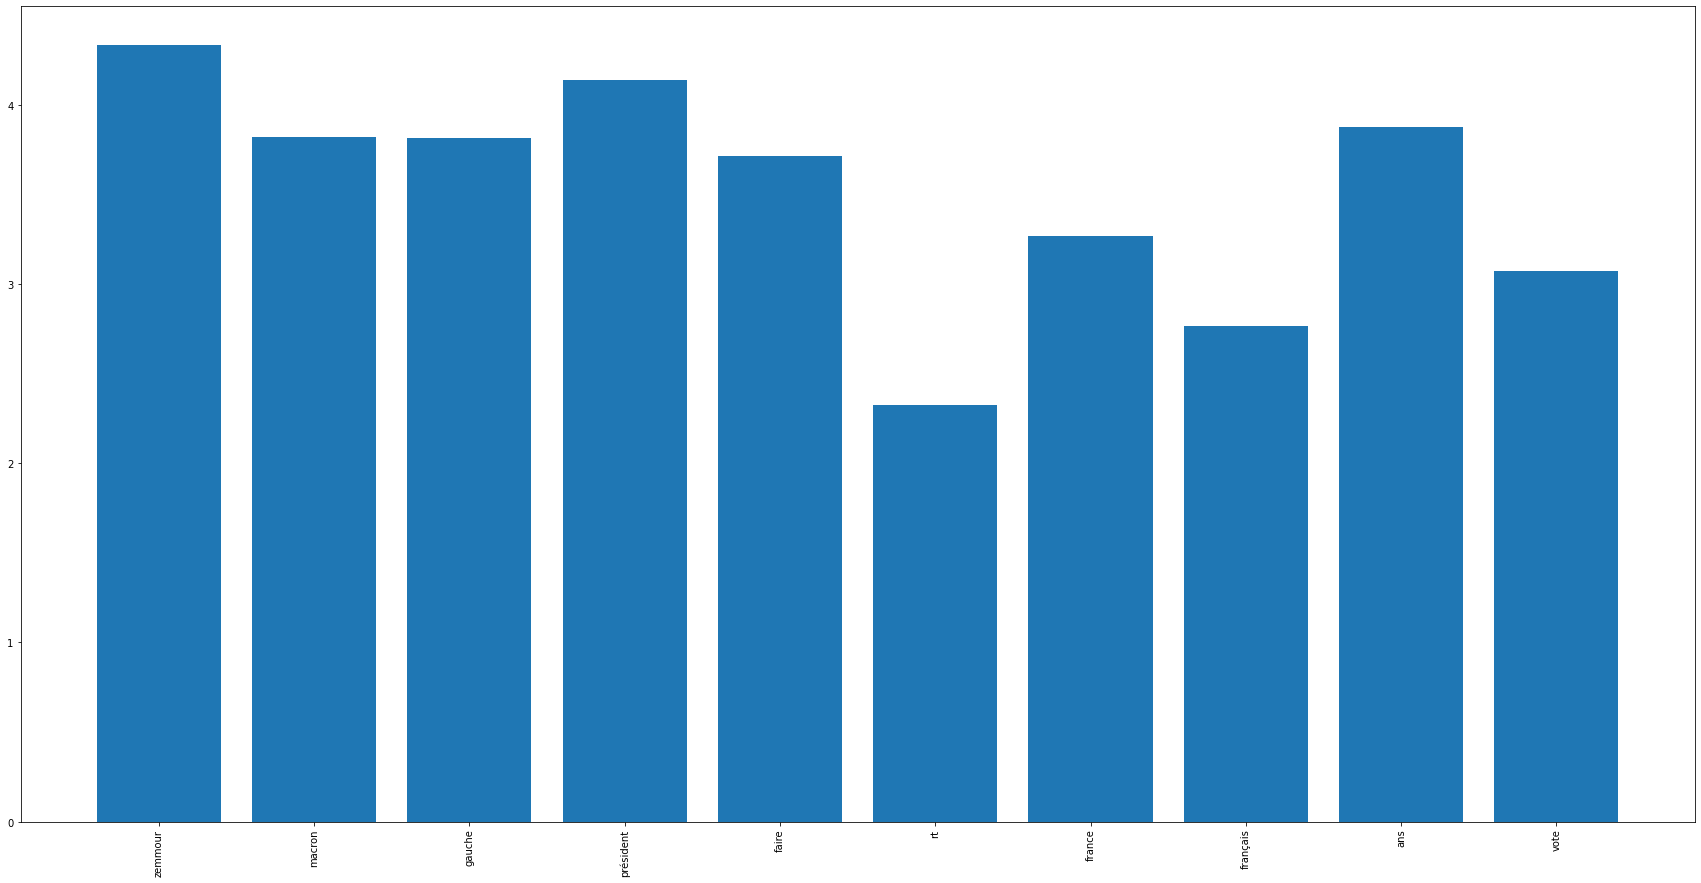

In [ ]:

vectorizer2 = TfidfVectorizer(max_features=100 )
# show vocabulary
vectorizer2.fit(X_train['text'])
# histogram of the vocabulary
plt.figure(figsize=(30,15))
plt.bar(range(len(vectorizer2.vocabulary_)), vectorizer2.idf_)
plt.xticks(range(len(vectorizer2.vocabulary_)), list(vectorizer2.vocabulary_.keys()), rotation=90)
plt.show()


# show document feature vectors
X_train_tfidf2 = vectorizer2.transform(X_train['text'])
X_test_tfidf2 = vectorizer2.transform(X_test['text'])
#Xtrain_tfidf to data frame
X_train_tfidf2 = pd.DataFrame(X_train_tfidf2.toarray())
#Xtest_tfidf to data frame


